<a href="https://colab.research.google.com/github/daliaydom/Clases-IA/blob/main/Clasificacion_actividades_sensores_inerciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de la actividad humana mediante datos de sensores
Este ejemplo muestra cómo extraer características y crear un clasificador capaz de identificar cinco tipos de actividad diferentes (sentado, de pie, caminando, corriendo y bailando) a partir de las mediciones de los sensores registradas en un smartphone.

## Cargar datos

In [1]:
!git clone https://github.com/daliaydom/Clases-IA

fatal: destination path 'Clases-IA' already exists and is not an empty directory.


Leemos el archivo fuente de los datos

In [2]:
# Abrir el archivo en modo lectura
data = []
categories = ['A','B','C','D','E']
with open('Clases-IA/data_1600_accel_phone.txt', 'r') as archivo:
    # Leer e imprimir cada línea del archivo
    for linea in archivo:
        split_line = [linea.split(',')[i] for i in [1,3,4,5]]
        split_line[-1] = split_line[-1][:-2]
        if split_line[0] not in categories:
          break
        data.append(split_line)

In [3]:
import pandas as pd
import numpy as np

In [4]:
acc_axis = ['acx','acy','acz']
df = pd.DataFrame(data,columns=['activity']+acc_axis)
activities = ['Walking','Jogging', 'Stairs','Sitting','Standing']
df['activity'] = df['activity'].map(dict(zip(categories,activities)))
df.head()

,activity,acx,acy,acz
0,Walking,-0.36476135,8.793503,1.0550842
1,Walking,-0.8797302,9.768784,1.0169983
2,Walking,2.0014954,11.10907,2.619156
3,Walking,0.45062256,12.651642,0.18455505
4,Walking,-2.1643524,13.928436,-4.4224854


## Transformación de datos

In [5]:
print(df.dtypes)

activity    object
acx         object
acy         object
acz         object
dtype: object


In [6]:
for column in df.columns[1:]:
  df[column] = df[column].astype(float)

In [7]:
print(df.dtypes)

activity     object
acx         float64
acy         float64
acz         float64
dtype: object


## Visualización

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

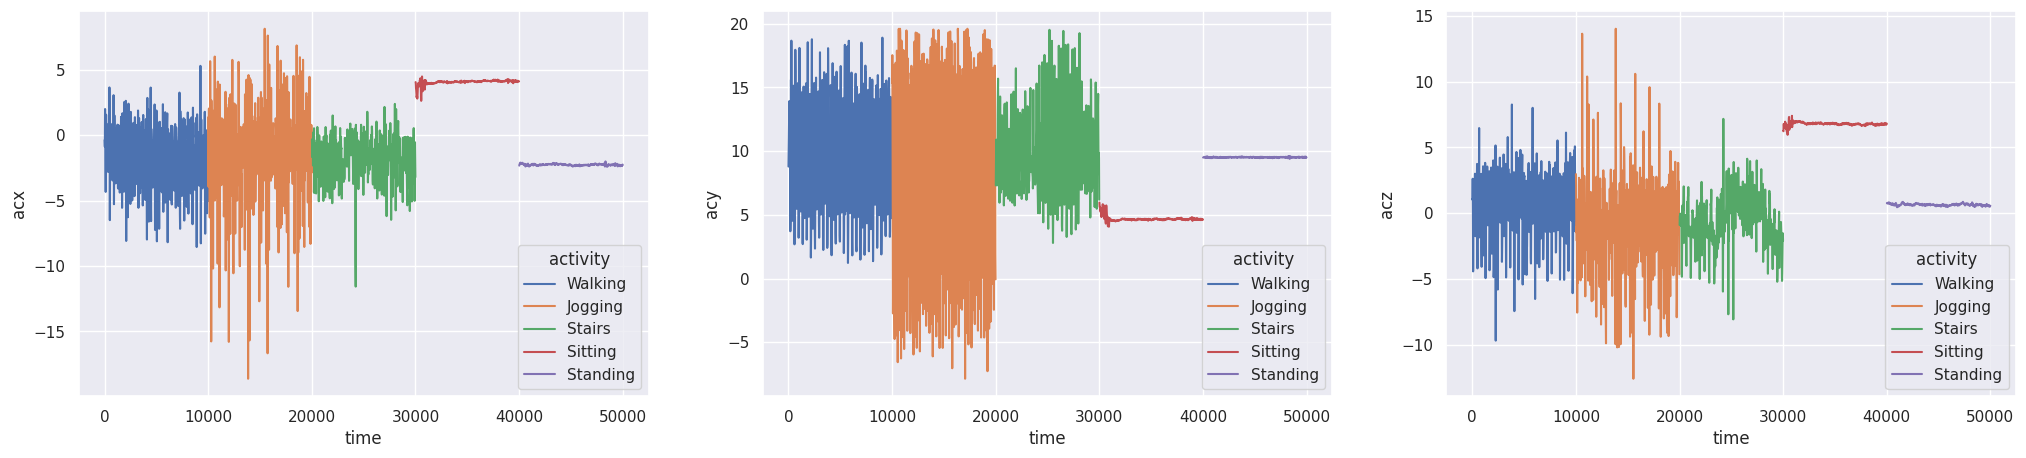

In [9]:
n = 500
frames = [df[df['activity']==activity].head(n) for activity in activities]
df_viz = pd.concat(frames)
fs = 1/20
samples = df_viz.shape[0]
df_viz['time'] = np.linspace(0,samples/fs,samples)


sns.set_theme(style="darkgrid")
plt.figure(figsize=(25,5))
for i,axis in enumerate(acc_axis):
  plt.subplot(1,3,i+1)
  sns.lineplot(data=df_viz, x='time', y=axis, hue="activity",markers=True, dashes=True)

## Análisis exploratorio

Verificar que las clases estén balanceadas

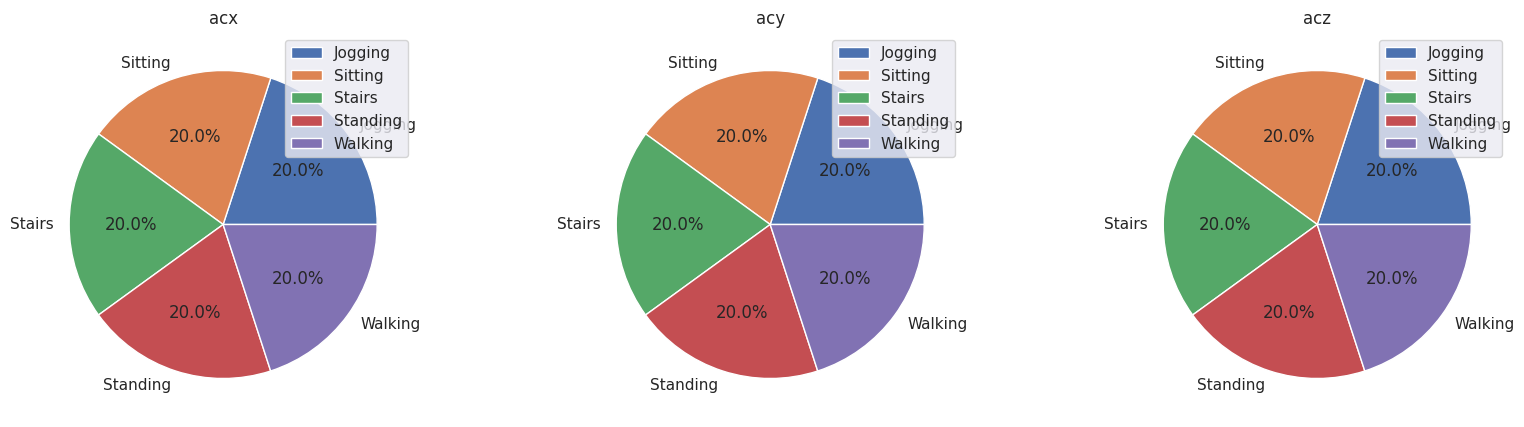

In [10]:
df.groupby(['activity']).count().plot(kind='pie',subplots=True,figsize=(20,5),layout=(1,3),sharex=False, title=acc_axis,ylabel="",autopct='%1.1f%%')
plt.show()

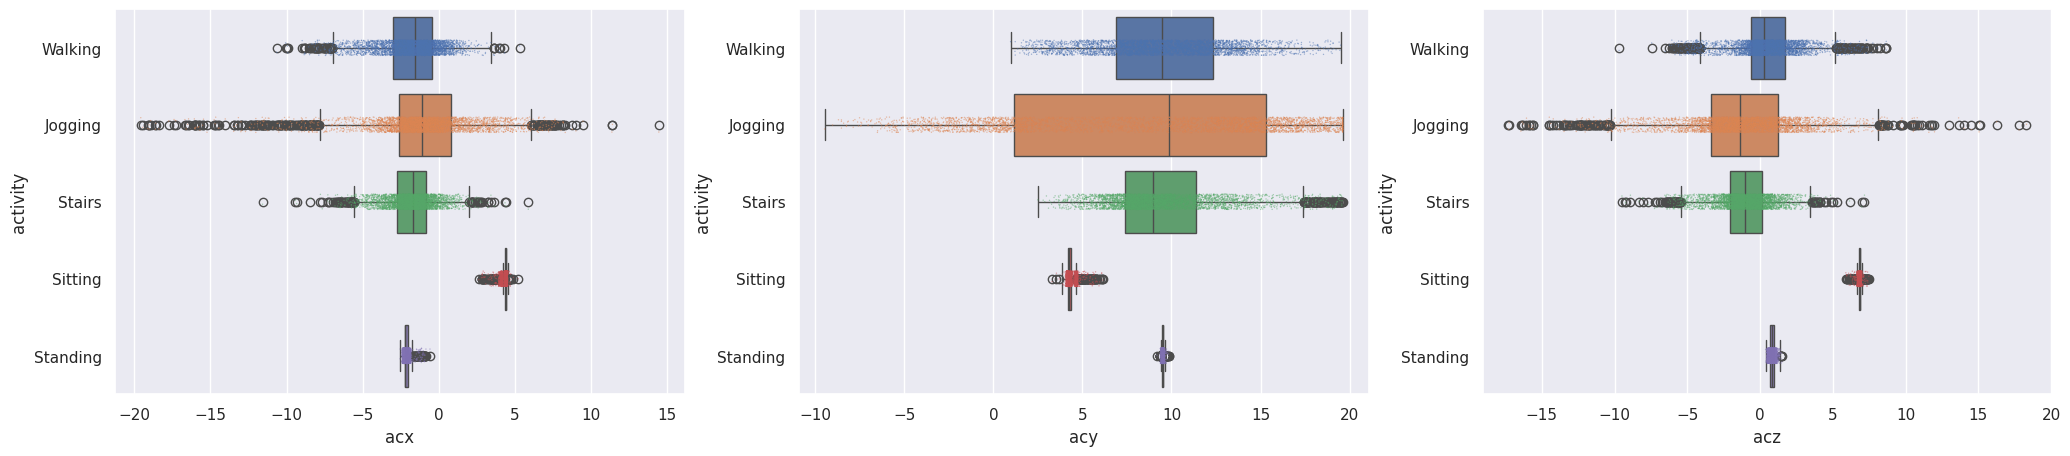

In [11]:
plt.figure(figsize=(25,5))
for i,axis in enumerate(acc_axis):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=df,x=axis,y='activity',hue='activity',palette="deep")
  sns.stripplot(data=df, x=axis, y='activity', hue='activity', size=1, alpha=.5)

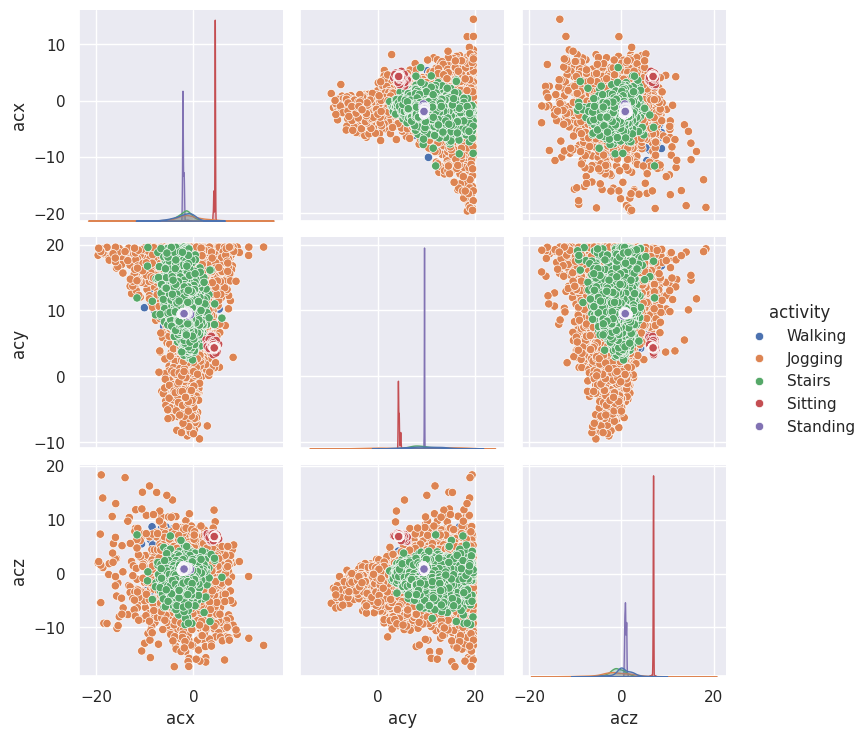

In [12]:
sns.pairplot(df, hue='activity')
plt.show()

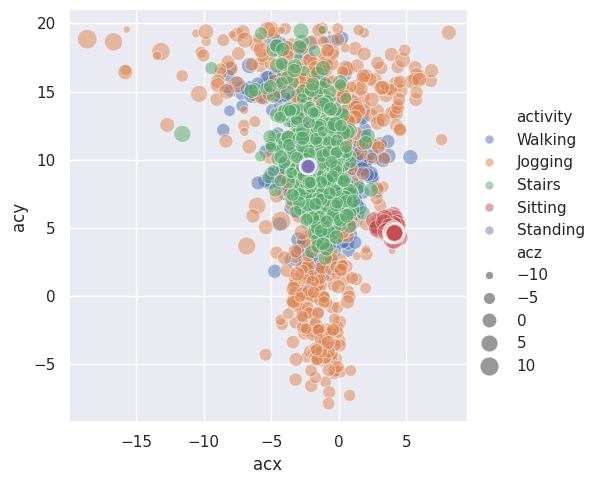

In [13]:
sns.relplot(
    data=df_viz,
    x="acx", y="acy",
    hue="activity", size="acz",
    sizes=(10, 200), alpha = 0.5
)

## Entrenamiento

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# model = SVC()
# model.fit(X, y)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])

In [15]:
X = df[acc_axis].to_numpy()
y = df['activity'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [16]:
 model = SVC()
 model.fit(X_train,y_train)

SVC()

## Predicción

In [17]:
ytrain_pred = model.predict(X_train) #Entrenamiento
ytest_pred = model.predict(X_test) #Validación

## Evaluación

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Entrenamiento

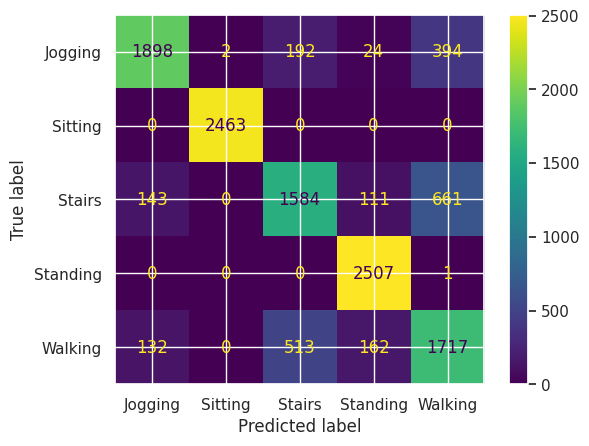

In [21]:
cm_train = confusion_matrix(y_train, ytrain_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [61]:
metrics = precision_recall_fscore_support(y_train, ytrain_pred,average='micro')
metric_names = ['precision: {metric:.2f}','recall:  {metric:.2f}','fscore:  {metric:.2f}']
print('Métricas de entrnamiento')
for name,metric in zip(metric_names,metrics):
  print(name.format(metric=metric))

Métricas de entrnamiento
precision: 0.81
recall:  0.81
fscore:  0.81


In [62]:
metrics

(0.8132597568777991, 0.8132597568777991, 0.8132597568777991, None)

### Validación

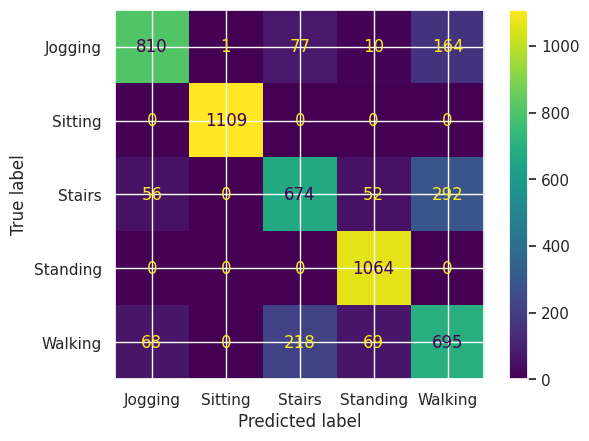

In [23]:
cm_test = confusion_matrix(y_test, ytest_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()

In [65]:
metrics = precision_recall_fscore_support(y_test, ytest_pred,average='micro')
metric_names = ['precision: {metric:.2f}','recall:  {metric:.2f}','fscore:  {metric:.2f}']
print('Métricas de entrnamiento')
for name,metric in zip(metric_names,metrics):
  print(name.format(metric=metric))

Métricas de entrnamiento
precision: 0.81
recall:  0.81
fscore:  0.81


##  Comparación de modelos

In [76]:
from sklearn.metrics import accuracy_score

In [83]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [SVC(kernel = k) for k in kernels]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [75]:
for model in models:
  print(model)
  model.fit(X_train,y_train)

SVC(kernel='linear')
SVC(kernel='poly')
SVC()
SVC(kernel='sigmoid')


In [82]:
acc_train = [accuracy_score(y_train, model.predict(X_train)) for model in models]
acc_test = [accuracy_score(y_test, model.predict(X_test)) for model in models]

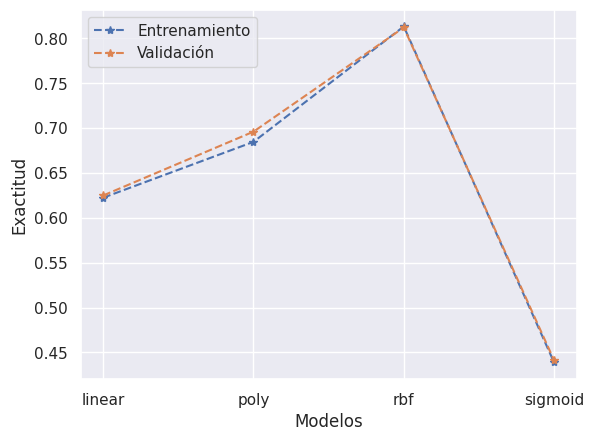

In [92]:
plt.plot(acc_train,'*--',label='Entrenamiento')
plt.plot(acc_test,'*--',label='Validación')
plt.ylabel('Exactitud')
plt.xlabel('Modelos')
plt.legend()
plt.xticks([0, 1, 2, 3], kernels)
plt.show()